In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


In [2]:
data = pd.read_csv("C:\\Users\\91923\\Downloads\\Language Detection.csv\\Language Detection.csv")
data.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [3]:
data["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data["Text"], 
                                                    data["Language"], 
                                                    test_size=0.33, 
                                                    stratify=data["Language"],
                                                    random_state=42)


cv = CountVectorizer()
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9742086752637749


In [5]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9742086752637749
Classification report:
               precision    recall  f1-score   support

      Arabic       1.00      0.97      0.98       177
      Danish       1.00      0.95      0.97       141
       Dutch       1.00      0.98      0.99       180
     English       0.87      1.00      0.93       457
      French       0.98      0.99      0.99       335
      German       1.00      0.97      0.98       155
       Greek       1.00      0.97      0.98       121
       Hindi       1.00      0.95      0.98        21
     Italian       1.00      0.97      0.98       230
     Kannada       1.00      0.94      0.97       122
   Malayalam       0.99      0.99      0.99       196
  Portugeese       1.00      0.98      0.99       244
     Russian       1.00      0.96      0.98       228
     Spanish       0.99      0.97      0.98       270
    Sweedish       0.98      0.98      0.98       223
       Tamil       1.00      0.99      0.99       155
     Turkish       1.00     

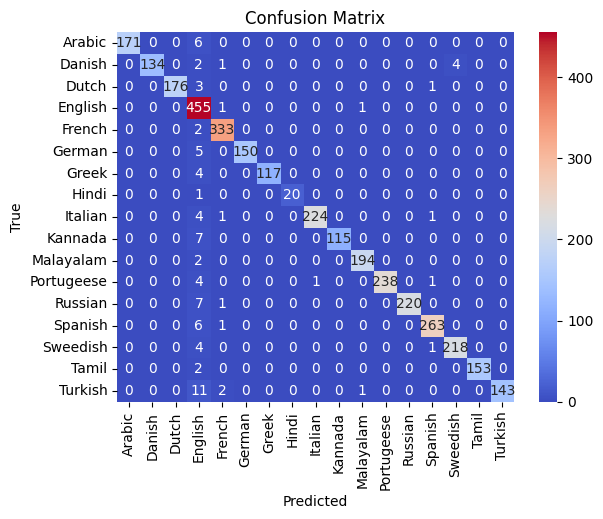

In [6]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

cmap = sns.color_palette("coolwarm", as_cmap=True)

sns.heatmap(cm, annot=True, fmt="d", cmap=cmap,
            xticklabels=model.classes_, yticklabels=model.classes_)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.xticks(rotation=90)

plt.show()


In [7]:
user_text = "Got a selection of good things on sale, stranger"

user_data = cv.transform([user_text])

prediction = model.predict(user_data)

predicted_language = prediction[0]

print("The detected language is:", predicted_language)

The detected language is: English
